# Plotting pressure bump diagnostics

## Setup and get Parameters

In [40]:
%matplotlib inline
import numpy as np
import pencilnew as pcn
import matplotlib.pyplot as plt

In [41]:
from math import ceil

def takespread(sequence, num):
    length = float(len(sequence))
    for i in range(num):
        yield sequence[int(ceil(i * length / num))]

In [42]:
sim = pcn.get_sim(); sim = sim.update()
#grid = pcn.read.grid()
grid = sim.grid

In [43]:
Lx = sim.grid.Lx
x = sim.grid.x

pb_type = sim.param['pb_type']
#pb_amplitude = sim.param['pb_amplitude']
pb_amplitude = 0.01

print('Amplitude: '+str(pb_amplitude))

if pb_type == 'sinwave-x':
    pb_profile = pb_amplitude*np.sin(2*np.pi/Lx*x)
    
else:
    print('! ERROR')

Amplitude: 0.01


## Comparing old pressure gradient and new gradient

In [44]:
print('old global pressure gradient: '+str(sim.param['beta_glnrho_global'][0]))
print('new pressure gradient profile AMPLITUDE: '+str(sim.param['pb_amplitude']))
print('!! The amplitude is multiplied with the global gradient when applied!! see below!')

old global pressure gradient: -0.100000001
new pressure gradient profile AMPLITUDE: 0.00999999978
!! The amplitude is multiplied with the global gradient when applied!! see below!


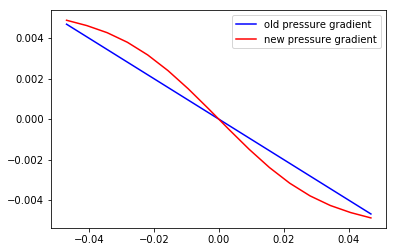

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

old_pgrad = sim.param['beta_glnrho_global'][0]*x
new_pgrad = old_pgrad + sim.param['beta_glnrho_global'][0]*pb_profile

ax.plot(x, old_pgrad, color='blue', label='old pressure gradient')
ax.plot(x, new_pgrad, color='red', label='new pressure gradient')

ax.legend()

## Plots of a 2D (x-y) simulation
With new pressure bump as above.

0.0
min=0.0 - max=0.0
0.00688334
min=0.00686864 - max=0.00689788
0.0135364
min=0.0135246 - max=0.0135485
0.0200981
min=0.0200953 - max=0.0201006
0.0265403
min=0.0265249 - max=0.0265553


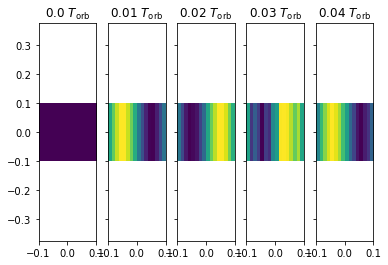

In [46]:
N = 5
fig, axes = plt.subplots(1,N,sharey=True,sharex=True)
varlist = sim.get_varlist()
varlist = takespread(varlist, N)

for var, ax in zip(varlist, axes):
    VAR = pcn.read.var(var_file=var, trim_all=True, quiet=True)
    a = ax.imshow(VAR.ux[0], 
                  interpolation='none', 
                  extent=[-Lx, Lx, -Lx, Lx], 
                  #vmin = 0.026,
                  #vmax = 0.027,
                  aspect=1)
    print(np.mean(VAR.ux))
    ax.set_title(str(VAR.t/(np.pi*2))[:4]+' $T_\mathrm{orb}$');
    print('min='+str(VAR.ux.min())+' - max='+str(VAR.ux.max()))

    
#fig.colorbar(a)
plt.show()

In [64]:
varlist = sim.get_varlist()

Nt = np.size(varlist)
Nx = np.size(sim.grid.x)

ARRAY = np.zeros((Nt, Nx))

for i, var in zip(range(Nt), varlist):
    pcn.backpack.printProgressBar(i, Nt-1)
    VAR = pcn.read.var(var_file=var, trim_all=True, quiet=True)
    ARRAY[i] = VAR.rho[0].mean(axis=0)

 |XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX| 100.0% 


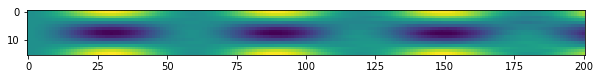

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(ARRAY.T)

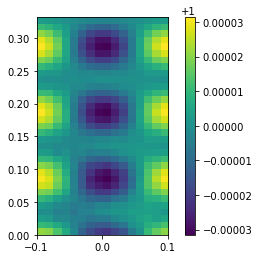

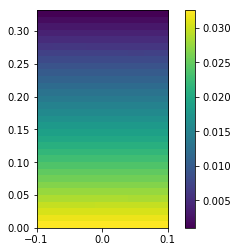

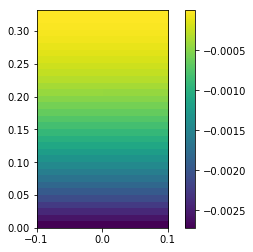

In [49]:
av = pcn.read.aver('y')
plt.figure()
a = plt.imshow(av.y.rhomxz[:,:,0], extent=[-Lx, Lx, 0, av.t[-1]])
plt.colorbar()

plt.figure()
plt.imshow(av.y.uxmxz[:,:,0], extent=[-Lx, Lx, 0, av.t[-1]])
plt.colorbar()

plt.figure()
plt.imshow(av.y.uymxz[:,:,0], extent=[-Lx, Lx, 0, av.t[-1]])
plt.colorbar()

0.0
-0.00274544


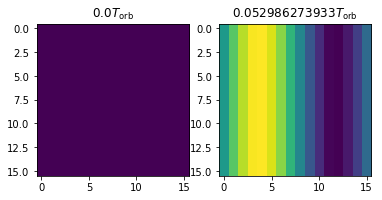

In [50]:
fig, axes = plt.subplots(1,2)
varlist = sim.get_varlist()
varlist = [varlist[0],varlist[-1]]

for var, ax in zip(varlist, axes):
    VAR = pcn.read.var(var_file=var, trim_all=True, quiet=True)
    ax.imshow(VAR.uy[0])
    print(np.mean(VAR.uy))
    ax.set_title(str(VAR.t/(np.pi*2))+'$T_\mathrm{orb}$')

plt.show()